In [ ]:
# -*- coding: utf-8 -*-
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../")))
from utils.config import PROJECT_DIR
from utils.colors import COLOR_PALETTE
from utils.tcmb_meeting_dates import TCMB_MEETING_DATES
from utils.inflation_release_dates import INFLATION_DATES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle(PROJECT_DIR / "processed_data" / '20162021_data_cleaned.pkl')

### Daily Tweets with Monetary Policy Dates

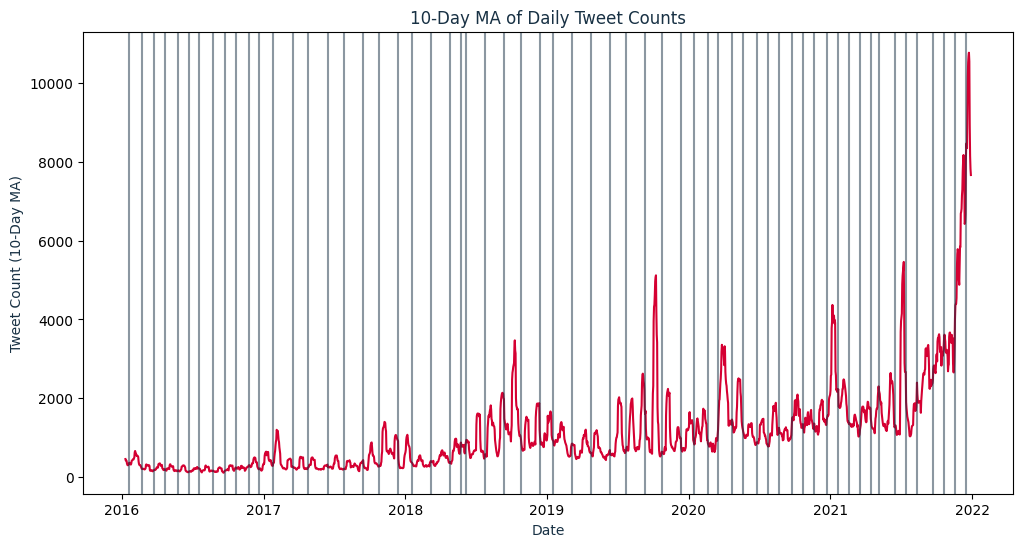

In [ ]:
# Convert "day" column to datetime format
df["day"] = pd.to_datetime(df["day"])
daily_tweet_counts = df.groupby("day")["clean_tweet"].count()

# Compute 10-day Moving Average (MA)
daily_tweet_counts_MA10 = daily_tweet_counts.rolling(window=10).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_tweet_counts_MA10, color=COLOR_PALETTE["tcmb_red"], label="10-Day Moving Avg of Daily Tweet Counts")
for date in TCMB_MEETING_DATES:
    plt.axvline(x=date, color=COLOR_PALETTE["tcmb_lacivert"], alpha=0.5)
plt.title("10-Day MA of Daily Tweet Counts", color=COLOR_PALETTE["tcmb_lacivert"])
plt.xlabel("Date", color=COLOR_PALETTE["tcmb_lacivert"])
plt.ylabel("Tweet Count (10-Day MA)", color=COLOR_PALETTE["tcmb_lacivert"])
#plt.legend()
plt.show()

### Daily Tweets with Inflation Release Dates

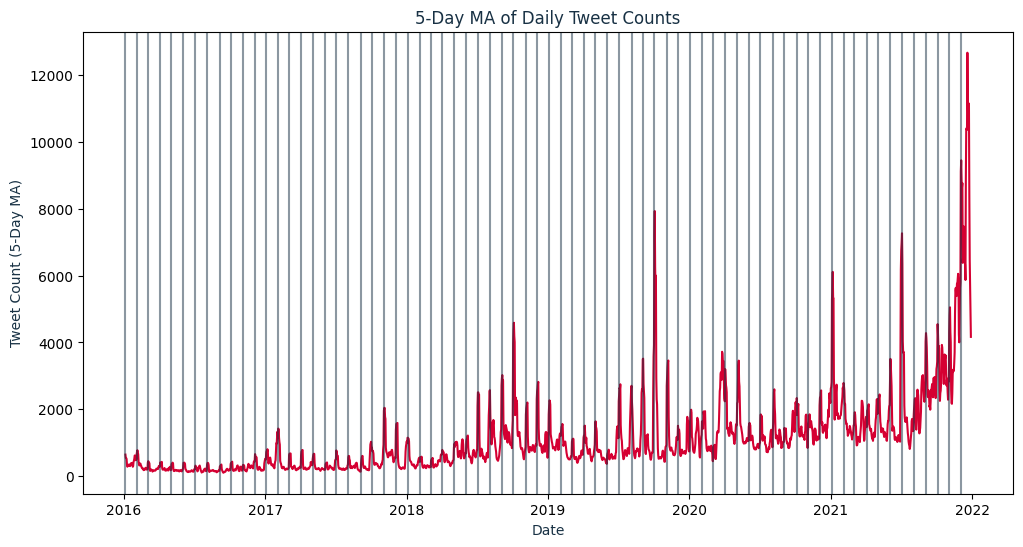

In [10]:
# Compute 5-day Moving Average (MA)
daily_tweet_counts_MA5 = daily_tweet_counts.rolling(window=5).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_tweet_counts_MA5, color=COLOR_PALETTE["tcmb_red"], label="5-Day Moving Avg of Daily Tweet Counts")
for date in INFLATION_DATES:
    plt.axvline(x=date, color=COLOR_PALETTE["tcmb_lacivert"], alpha=0.5)
plt.title("5-Day MA of Daily Tweet Counts", color=COLOR_PALETTE["tcmb_lacivert"])
plt.xlabel("Date", color=COLOR_PALETTE["tcmb_lacivert"])
plt.ylabel("Tweet Count (5-Day MA)", color=COLOR_PALETTE["tcmb_lacivert"])
#plt.legend()
plt.show()